# Feature Subtractions

This includes reducing features using k-means clustering or other methods. 

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     # to get images
import shutil       # to save files locally
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from random import randint
import  random
import os
os.chdir('/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')


from cmath import nan


In [2]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V19.csv')

## Reduce Affiliations using K-Means Clustering

In [3]:
# check the different affiliations
all_affiliations = fights['A_Affiliation'].unique()
all_affiliations

array(['MMA Lab', 'American Kickboxing Academy', 'Chicago Fight Team',
       'Florian Martial Arts Center', 'Renzo Gracie Academy',
       'Team Alpha Male', 'BMF Ranch', 'K-Taro Dojo', 'Arena Gym',
       'Bonebreakers MMA', 'American Top Team', 'Team KiBoJu',
       'Hilti NHB', 'City Kickboxing', nan,
       'Budokan Martial Arts Academy', 'Cerrado MMA',
       'Shooting Gym Hakkei', 'Great Britain Top Team',
       'Adrenaline MMA Training & Fitness', 'Keddles Gym', 'Danzig MMA',
       'Mjölnir', 'Octopus Łódź', 'Jackson Wink MMA',
       'Dragon Fight / Nova União', 'Saekson Janjira Muay Thai',
       'factoryX Muay Thai', 'Serra Jiu-Jitsu',
       'The Performance Compound', 'Team Quest Portland', 'Team Takedown',
       'Tiger Muay Thai', "Tiger Schulmann's Mixed Martial Arts",
       'RusFighters MMA', 'Tristar Gym', 'Ultimate Training Centre',
       'Team Figueiredo', "Striker's House", 'AMA Fight Club',
       'Tata Fight Team', 'Nova União', 'American Top Team Rome',
    

In [4]:
# aggregate data by affiliation, get mean and n for each affiliation
affiliation_means = fights.groupby('A_Affiliation').mean()

affiliation_means['fight_count'] = fights.groupby('A_Affiliation').size()

affiliation_means

,Unnamed: 0,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,A_Total_Strikes_land,...,B_Body_Length_to_Height_Ratio,Body_Length_to_Height_Ratio_Dif,A_Body_Length_to_Reach_Ratio,B_Body_Length_to_Reach_Ratio,Body_Length_to_Reach_Ratio_Dif,A_Body_Length_to_Leg_Reach_Ratio,B_Body_Length_to_Leg_Reach_Ratio,Body_Length_to_Leg_Reach_Ratio_Dif,Ruleset,fight_count
A_Affiliation,,,,,,,,,,,,,,,,,,,,,
10th Planet Austin,4512.000000,0.000000,0.500000,52.500000,131.000000,74.500000,150.000000,0.385000,0.480000,59.000000,...,0.433464,-0.033464,0.373333,0.423124,-0.049790,0.666667,0.765244,-0.098577,4.0,2
10th Planet Jiu Jitsu,4711.615385,0.153846,0.692308,21.615385,46.461538,24.692308,52.923077,0.507692,0.482308,30.384615,...,0.428889,-0.036997,0.374194,0.420130,-0.045936,0.644444,0.752928,-0.108484,4.0,13
10th Planet Jiu Jitsu Buena Park,4384.333333,0.000000,0.000000,47.333333,96.000000,52.333333,111.666667,0.476667,0.473333,64.333333,...,0.429993,-0.010638,0.412698,0.437735,-0.025037,0.722222,0.754386,-0.032164,4.0,3
10th Planet Jiu Jitsu Jacksonville,8917.000000,0.000000,0.000000,11.000000,29.000000,53.000000,89.000000,0.370000,0.590000,20.000000,...,0.426471,-0.004248,0.413043,0.432836,-0.019792,0.730769,0.743590,-0.012821,4.0,1
10th Planet Jiu Jitsu San Diego,5582.000000,0.000000,0.000000,32.000000,85.000000,58.500000,137.000000,0.395000,0.460000,66.000000,...,0.424173,-0.013320,0.389706,0.427355,-0.037650,0.697368,0.736660,-0.039291,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen Jiu-Jitsu,8005.500000,0.000000,1.000000,7.500000,24.500000,25.500000,56.000000,0.355000,0.530000,11.000000,...,0.419757,0.008814,0.422535,0.404960,0.017575,0.750000,0.723647,0.026353,4.0,2
Zenith MMA,6143.000000,0.000000,0.000000,17.000000,54.000000,58.000000,101.000000,0.310000,0.570000,17.000000,...,0.428571,0.023483,0.464789,0.422535,0.042254,0.825000,0.750000,0.075000,4.0,1
Zugec Ultimate Martial Arts,6348.600000,0.000000,0.000000,52.000000,117.000000,41.000000,106.800000,0.458000,0.452000,89.200000,...,0.445963,-0.037963,0.398361,0.433116,-0.034755,0.689394,0.807283,-0.117889,4.0,5


In [5]:
# get the dif columns in affiliation_means
dif_columns = [col for col in affiliation_means.columns if 'Dif' in col]
dif_columns

['Dif_Kd',
 'Dif_Sig_strike_land',
 'Dif_Sig_strike_att',
 'Dif_Sig_strike_percent',
 'Dif_Total_Strikes_land',
 'Dif_Total_Strikes_att',
 'Dif_Total_Strikes_percent',
 'Dif_Takedowns_land',
 'Dif_Takedowns_att',
 'Dif_Takedown_percent',
 'Dif_Sub_Attempts_land',
 'Dif_Sub_Attempts_att',
 'Dif_Sub_Success_Percent',
 'Dif_Rev',
 'Dif_Ctrl_time_min',
 'Dif_Ctrl_time_sec',
 'Dif_Ctrl_time_tot',
 'Dif_Head_Strikes_land',
 'Dif_Head_Strikes_att',
 'Dif_Head_Strikes_percent',
 'Dif_Body_Strikes_land',
 'Dif_Body_Strikes_att',
 'Dif_Body_Strikes_percent',
 'Dif_Leg_Strikes_land',
 'Dif_Leg_Strikes_att',
 'Dif_Leg_Strikes_percent',
 'Dif_Distance_Strikes_land',
 'Dif_Distance_Strikes_att',
 'Dif_Distance_Strikes_percent',
 'Dif_Clinch_Strikes_land',
 'Dif_Clinch_Strikes_att',
 'Dif_Clinch_Strikes_percent',
 'Dif_Ground_Strikes_land',
 'Dif_Ground_Strikes_att',
 'Dif_Ground_Strikes_percent',
 'Dif_Odds',
 'Dif_Rolling_Kd_mean',
 'Dif_Rolling_Sig_strike_land_mean',
 'Dif_Rolling_Sig_strike_att_m

For our K-Means Clustering, lets use:
- fight_count
- win?
- Dif_Kd
- Dif_Sig_strike_att
- Dif_Sig_strike_percent
- Dif_Ctrl_time_sec
- Dif_Sub_Attempts_att
- Dif_Sub_Success_Percent
- Dif_Leg_Strikes_att
- Dif_Head_Strikes_att
- Dif_Body_Strikes_att

In [6]:
df_cluster = affiliation_means[['fight_count', 'win?', 'Dif_Kd', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent', 'Dif_Ctrl_time_sec', 'Dif_Sub_Attempts_att', 'Dif_Sub_Success_Percent', 'Dif_Leg_Strikes_att', 'Dif_Head_Strikes_att', 'Dif_Body_Strikes_att']]
df_cluster

,fight_count,win?,Dif_Kd,Dif_Sig_strike_att,Dif_Sig_strike_percent,Dif_Ctrl_time_sec,Dif_Sub_Attempts_att,Dif_Sub_Success_Percent,Dif_Leg_Strikes_att,Dif_Head_Strikes_att,Dif_Body_Strikes_att
A_Affiliation,,,,,,,,,,,
10th Planet Austin,2,0.000000,-0.500000,-19.000000,-0.095000,-51.500000,0.0,0.0,-7.000000,-7.000000,-5.000000
10th Planet Jiu Jitsu,13,0.461538,-0.538462,-6.461538,0.025385,-0.923077,0.0,0.0,-2.076923,-12.307692,7.923077
10th Planet Jiu Jitsu Buena Park,3,0.000000,0.000000,-15.666667,0.003333,12.333333,0.0,0.0,2.000000,-18.000000,0.333333
10th Planet Jiu Jitsu Jacksonville,1,0.000000,0.000000,-60.000000,-0.220000,11.000000,0.0,0.0,-4.000000,-44.000000,-12.000000
10th Planet Jiu Jitsu San Diego,2,0.000000,0.000000,-52.000000,-0.065000,-26.000000,0.0,0.0,9.500000,-43.500000,-18.000000
...,...,...,...,...,...,...,...,...,...,...,...
Zen Jiu-Jitsu,2,0.000000,-1.000000,-31.500000,-0.175000,-40.500000,0.0,0.0,-2.500000,-26.500000,-2.500000
Zenith MMA,1,0.000000,0.000000,-47.000000,-0.260000,7.000000,0.0,0.0,-8.000000,-10.000000,-29.000000
Zugec Ultimate Martial Arts,5,0.200000,0.000000,10.200000,0.006000,16.400000,0.0,0.0,2.800000,6.200000,1.200000


Determine optimal number of Clusters

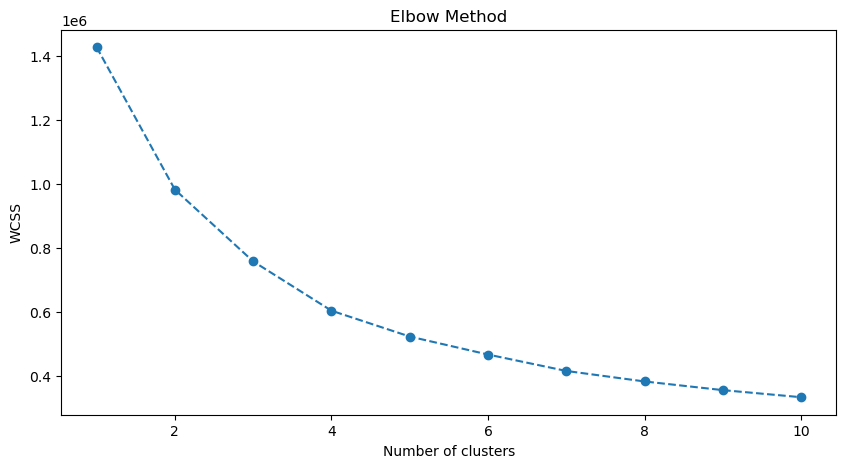

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster-Sum-of-Squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Apply k-means
optimal_clusters = 7  # Assuming 3 was the elbow point, adjust this based on your plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster)

In [9]:
fights['A_Affiliation_Cluster'] = fights['A_Affiliation'].map(dict(zip(fights['A_Affiliation'].unique(), cluster_labels)))
fights['B_Affiliation_Cluster'] = fights['B_Affiliation'].map(dict(zip(fights['B_Affiliation'].unique(), cluster_labels)))

## Reduce Fighting_Out_Of using K-means clustering

In [10]:
# aggregate data by fighting_out_of, get mean and n for each fighting_out_of
fighting_out_of_means = fights.groupby('A_Fighting_Out_Of').mean()

fighting_out_of_means['fight_count'] = fights.groupby('A_Fighting_Out_Of').size()

fighting_out_of_means

,Unnamed: 0,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,A_Total_Strikes_land,...,A_Body_Length_to_Reach_Ratio,B_Body_Length_to_Reach_Ratio,Body_Length_to_Reach_Ratio_Dif,A_Body_Length_to_Leg_Reach_Ratio,B_Body_Length_to_Leg_Reach_Ratio,Body_Length_to_Leg_Reach_Ratio_Dif,Ruleset,A_Affiliation_Cluster,B_Affiliation_Cluster,fight_count
A_Fighting_Out_Of,,,,,,,,,,,,,,,,,,,,,
"Enumclaw, Washington, United States",1936.000000,0.000000,0.800000,34.800000,81.400000,40.800000,61.000000,0.460000,0.646000,69.000000,...,0.432432,0.410435,0.021997,0.780488,0.737937,0.042551,4.0,5.000000,1.400000,5
"Abertillery, Wales",4514.416667,0.250000,0.250000,37.083333,104.416667,36.000000,85.083333,0.360000,0.417500,47.000000,...,0.428018,0.413227,0.014791,0.785256,0.738498,0.046759,4.0,1.416667,1.916667,12
"Aktobe, Kazakhstan",5453.125000,0.000000,0.250000,40.125000,89.875000,41.375000,101.750000,0.413750,0.420000,55.250000,...,0.426944,0.417088,0.009856,0.780781,0.753418,0.027362,4.0,4.000000,1.875000,8
"Alabama, United States",4577.000000,2.000000,0.000000,51.000000,86.000000,7.000000,29.000000,0.590000,0.240000,51.000000,...,0.392857,0.426667,-0.033810,0.662651,0.820513,-0.157862,4.0,1.000000,6.000000,1
Alaska,3790.272727,0.454545,0.272727,49.545455,99.363636,51.272727,122.727273,0.513636,0.426364,58.818182,...,0.380645,0.399582,-0.018937,0.710843,0.712508,-0.001664,4.0,0.000000,1.272727,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yokohama-shi, Kanagawa, Japan",7615.000000,0.000000,0.000000,15.000000,31.000000,70.000000,89.000000,0.480000,0.780000,27.000000,...,0.416667,0.418919,-0.002252,0.750000,0.738095,0.011905,4.0,0.000000,0.000000,1
"Yokosuka, Kanagawa, Japan",4592.333333,0.000000,0.333333,19.333333,44.666667,35.333333,71.666667,0.396667,0.463333,44.000000,...,0.420290,0.422271,-0.001981,0.763158,0.768180,-0.005022,4.0,0.000000,3.333333,3
"Yuma, Arizona",5695.250000,0.500000,0.062500,40.812500,96.000000,37.937500,89.187500,0.435625,0.411875,50.812500,...,0.415591,0.400385,0.015207,0.752840,0.710462,0.042378,4.0,1.000000,1.687500,16


K-means selections

In [11]:
df_cluster = fighting_out_of_means[['fight_count', 'win?', 'Dif_Kd', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent', 'Dif_Ctrl_time_sec', 'Dif_Sub_Attempts_att', 'Dif_Sub_Success_Percent', 'Dif_Leg_Strikes_att', 'Dif_Head_Strikes_att', 'Dif_Body_Strikes_att']]
df_cluster

,fight_count,win?,Dif_Kd,Dif_Sig_strike_att,Dif_Sig_strike_percent,Dif_Ctrl_time_sec,Dif_Sub_Attempts_att,Dif_Sub_Success_Percent,Dif_Leg_Strikes_att,Dif_Head_Strikes_att,Dif_Body_Strikes_att
A_Fighting_Out_Of,,,,,,,,,,,
"Enumclaw, Washington, United States",5,0.400000,-0.800000,20.400000,-0.186000,-6.000000,0.0,0.0,-2.400000,23.200000,-0.400000
"Abertillery, Wales",12,0.583333,0.000000,19.333333,-0.057500,-11.416667,0.0,0.0,2.500000,15.666667,1.166667
"Aktobe, Kazakhstan",8,0.500000,-0.250000,-11.875000,-0.006250,6.250000,0.0,0.0,-1.000000,-7.875000,-3.000000
"Alabama, United States",1,1.000000,2.000000,57.000000,0.350000,1.000000,0.0,0.0,4.000000,43.000000,10.000000
Alaska,11,0.636364,0.181818,-23.363636,0.087273,-15.363636,0.0,0.0,2.636364,-30.272727,4.272727
...,...,...,...,...,...,...,...,...,...,...,...
"Yokohama-shi, Kanagawa, Japan",1,0.000000,0.000000,-58.000000,-0.300000,39.000000,0.0,0.0,-5.000000,-32.000000,-21.000000
"Yokosuka, Kanagawa, Japan",3,0.000000,-0.333333,-27.000000,-0.066667,-11.333333,0.0,0.0,9.000000,-22.000000,-14.000000
"Yuma, Arizona",16,0.437500,0.437500,6.812500,0.023750,9.937500,0.0,0.0,0.125000,6.812500,-0.125000


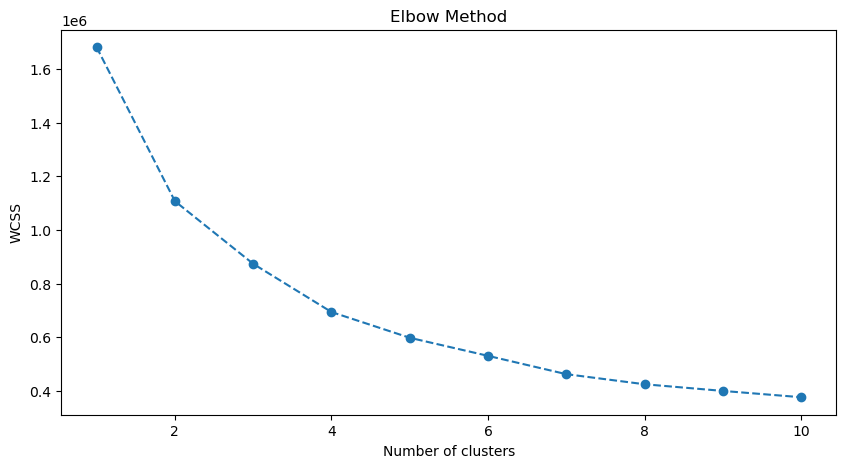

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster-Sum-of-Squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Apply k-means
optimal_clusters = 7  # Assuming 3 was the elbow point, adjust this based on your plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster)

In [14]:
fights['A_Fighting_Out_Of_Cluster'] = fights['A_Fighting_Out_Of'].map(dict(zip(fights['A_Fighting_Out_Of'].unique(), cluster_labels)))
fights['B_Fighting_Out_Of_Cluster'] = fights['B_Fighting_Out_Of'].map(dict(zip(fights['B_Fighting_Out_Of'].unique(), cluster_labels)))

## Reduce Martial_Art_# using K-means clustering

## Drop Affiliations and Fighting_Out_Of

In [15]:
# drop the original columns
fights.drop(['A_Affiliation', 'B_Affiliation', 'A_Fighting_Out_Of', 'B_Fighting_Out_Of'], axis=1, inplace=True)

Save

In [16]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V20.csv', index=False)

fights.to_csv()